In [95]:
import pandas as pd

# lire le fichier csv
data = pd.read_csv('Dataset_Abandon_Scolaire.csv')

# Afficher les 5 premier lignes du dataset
data.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0


In [96]:
#voir les valeurs manquantes
data.isnull().sum()

Age                     0
 Sexe                   0
 Taux_presence          0
 Nombre_retards         0
 Note_moyenne           0
 Situation_familiale    0
 Abandon                0
dtype: int64

In [97]:
# La distribution des valeurs
data.describe()

,Age,Taux_presence,Nombre_retards,Note_moyenne,Abandon
count,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000
mean,20.5930,84.637016,2.593500,13.441019,0.084000
std,2.0133,7.921973,1.788255,1.809283,0.277457
min,14.0000,59.586369,0.000000,7.615012,0.000000
25%,19.0000,79.279829,1.000000,12.268147,0.000000
50%,21.0000,84.813868,3.000000,13.470242,0.000000
75%,22.0000,90.169016,4.000000,14.688037,0.000000
max,28.0000,100.000000,9.000000,18.833574,1.000000


### On remarque que les valeurs sont parfaite et y a pas de valeurs manquates ni d'Outliers
### On a juste deux variables catégoriales sexe et situation familiale et les autres valeurs on vas les normaliser

In [98]:
#la distribution de la variable cible
data[' Abandon'].value_counts()

 Abandon
0    1832
1     168
Name: count, dtype: int64

### On remarque que la distribution de la valeur cible n'est pas equilibre, on déduit directement que l'accuracy ne sera pas la metric idéal pour l'apprentissage.

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import pandas as pd

# Nettoyer les noms de colonnes (enlever les espaces)
data.columns = data.columns.str.strip()

# Normalisation des colonnes numériques
scaler = MinMaxScaler()
numerical_columns = ['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Choix du modèle SentenceTransformer (rapide et multilingue)
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Encodage de la colonne Situation_familiale
sentences = data['Situation_familiale'].astype(str).tolist()
embeddings = model.encode(sentences)


# Suppression de la colonne cible si elle existe
data_features = data.drop(columns=['Abandon'])

# Aperçu
data_features.head()


,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale
0,0.500000,Femme,0.742290,0.222222,0.731991,Enfants à charge
1,0.428571,Homme,0.275320,0.333333,0.464796,Célibataire
2,0.571429,Femme,0.557648,0.111111,0.487701,Enfants à charge
3,0.714286,Homme,0.688443,0.333333,0.657573,Célibataire
4,0.428571,Homme,0.665229,0.333333,0.450738,Marié


In [100]:
# Ajouter les embeddings à data_features
embeddings_data = pd.DataFrame(embeddings, columns=[f'emb_{i}' for i in range(embeddings.shape[1])])
data_features = pd.concat([data_features.reset_index(drop=True), embeddings_data.reset_index(drop=True)], axis=1)
data_features.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,emb_0,emb_1,emb_2,emb_3,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,0.500000,Femme,0.742290,0.222222,0.731991,Enfants à charge,0.068561,0.335021,-0.059778,0.007964,...,0.412813,-0.052149,0.085520,0.017431,-0.193396,0.191733,0.111831,0.140096,0.066416,0.203782
1,0.428571,Homme,0.275320,0.333333,0.464796,Célibataire,0.151948,0.088732,-0.185485,0.000529,...,0.098408,-0.092913,0.249011,0.298787,-0.235641,-0.016821,0.143355,-0.256276,0.231025,0.021499
2,0.571429,Femme,0.557648,0.111111,0.487701,Enfants à charge,0.068561,0.335021,-0.059778,0.007964,...,0.412813,-0.052149,0.085520,0.017431,-0.193396,0.191733,0.111831,0.140096,0.066416,0.203782
3,0.714286,Homme,0.688443,0.333333,0.657573,Célibataire,0.151948,0.088732,-0.185485,0.000529,...,0.098408,-0.092913,0.249011,0.298787,-0.235641,-0.016821,0.143355,-0.256276,0.231025,0.021499
4,0.428571,Homme,0.665229,0.333333,0.450738,Marié,0.033296,0.104033,0.072741,0.347456,...,-0.076270,-0.040243,0.255220,0.042167,-0.133813,0.233323,0.233572,-0.185901,-0.041262,0.001271


In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# Display the updated data_features
# Label encode the 'Sexe' column
label_encoder = LabelEncoder()
data['Sexe'] = label_encoder.fit_transform(data['Sexe'].astype(str))

# Update the data_features DataFrame
data_features['Sexe'] = data['Sexe']

# Display the updated data_features
data_features.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,emb_0,emb_1,emb_2,emb_3,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,0.500000,0,0.742290,0.222222,0.731991,Enfants à charge,0.068561,0.335021,-0.059778,0.007964,...,0.412813,-0.052149,0.085520,0.017431,-0.193396,0.191733,0.111831,0.140096,0.066416,0.203782
1,0.428571,1,0.275320,0.333333,0.464796,Célibataire,0.151948,0.088732,-0.185485,0.000529,...,0.098408,-0.092913,0.249011,0.298787,-0.235641,-0.016821,0.143355,-0.256276,0.231025,0.021499
2,0.571429,0,0.557648,0.111111,0.487701,Enfants à charge,0.068561,0.335021,-0.059778,0.007964,...,0.412813,-0.052149,0.085520,0.017431,-0.193396,0.191733,0.111831,0.140096,0.066416,0.203782
3,0.714286,1,0.688443,0.333333,0.657573,Célibataire,0.151948,0.088732,-0.185485,0.000529,...,0.098408,-0.092913,0.249011,0.298787,-0.235641,-0.016821,0.143355,-0.256276,0.231025,0.021499
4,0.428571,1,0.665229,0.333333,0.450738,Marié,0.033296,0.104033,0.072741,0.347456,...,-0.076270,-0.040243,0.255220,0.042167,-0.133813,0.233323,0.233572,-0.185901,-0.041262,0.001271


In [102]:
data_features.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,emb_0,emb_1,emb_2,emb_3,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,0.500000,0,0.742290,0.222222,0.731991,Enfants à charge,0.068561,0.335021,-0.059778,0.007964,...,0.412813,-0.052149,0.085520,0.017431,-0.193396,0.191733,0.111831,0.140096,0.066416,0.203782
1,0.428571,1,0.275320,0.333333,0.464796,Célibataire,0.151948,0.088732,-0.185485,0.000529,...,0.098408,-0.092913,0.249011,0.298787,-0.235641,-0.016821,0.143355,-0.256276,0.231025,0.021499
2,0.571429,0,0.557648,0.111111,0.487701,Enfants à charge,0.068561,0.335021,-0.059778,0.007964,...,0.412813,-0.052149,0.085520,0.017431,-0.193396,0.191733,0.111831,0.140096,0.066416,0.203782
3,0.714286,1,0.688443,0.333333,0.657573,Célibataire,0.151948,0.088732,-0.185485,0.000529,...,0.098408,-0.092913,0.249011,0.298787,-0.235641,-0.016821,0.143355,-0.256276,0.231025,0.021499
4,0.428571,1,0.665229,0.333333,0.450738,Marié,0.033296,0.104033,0.072741,0.347456,...,-0.076270,-0.040243,0.255220,0.042167,-0.133813,0.233323,0.233572,-0.185901,-0.041262,0.001271


<Figure size 800x600 with 0 Axes>

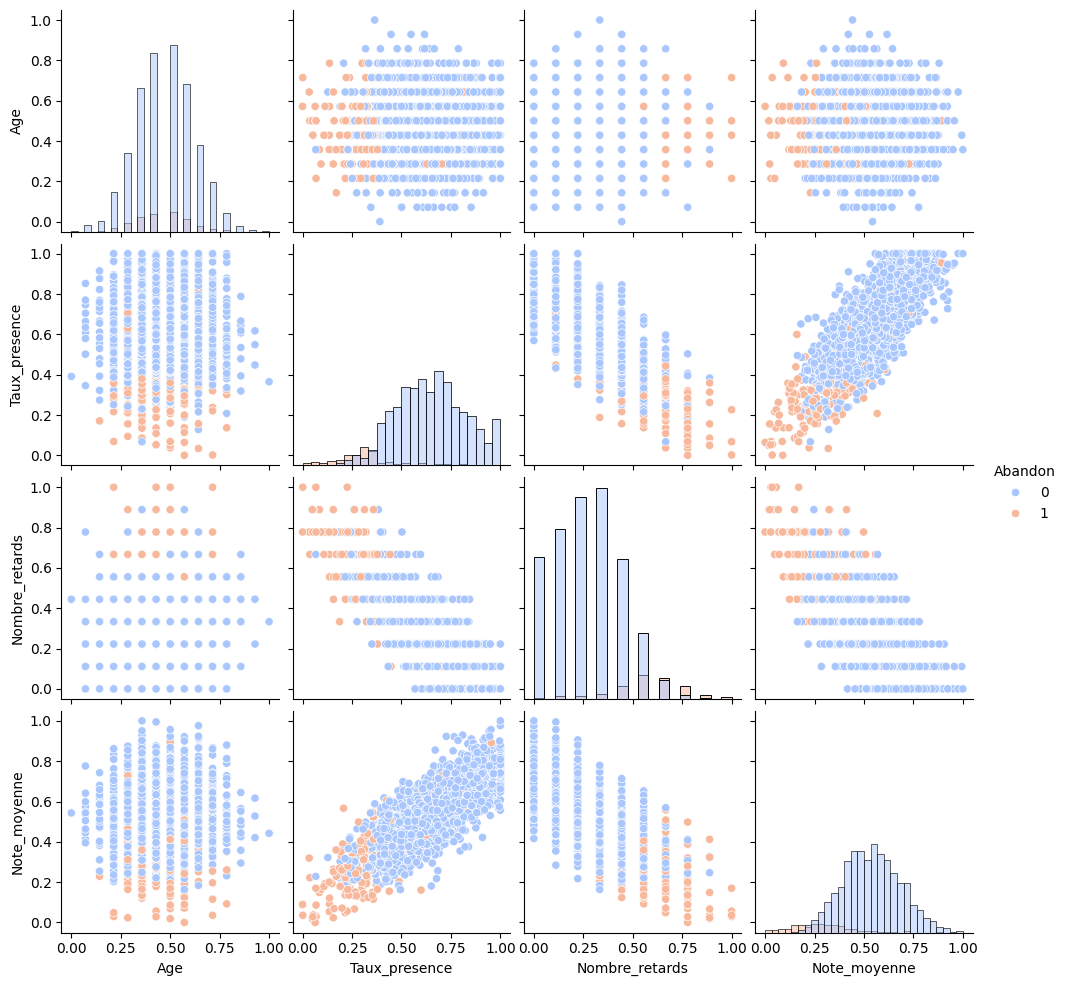

In [103]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Afficher toutes les paires de variables numériques en scatter, colorées par Abandon

# Ajouter la colonne cible à data_features pour l'affichage
plot_data = data_features.copy()
plot_data['Abandon'] = data['Abandon']

# Afficher la matrice de scatter plots
sns.pairplot(plot_data[numerical_columns + ['Abandon']], hue='Abandon', palette='coolwarm', diag_kind='hist')
plt.show()

### Analyse des visualisations et de la distribution des données

- La distribution déséquilibrée de la variable cible (`Abandon`) rend l’interprétation des graphiques difficile.
- Les nuages de points sont fortement entrelacés, ce qui indique une faible séparabilité visuelle entre les classes.
- Ce déséquilibre peut biaiser les modèles d’apprentissage automatique et limiter la pertinence des conclusions issues de l’analyse exploratoire.
- Il sera donc nécessaire d’envisager des techniques de rééquilibrage (comme le sur-échantillonnage ou le sous-échantillonnage) et d’utiliser des métriques adaptées (AUC, F1-score, etc.) pour évaluer les performances des modèles.

In [105]:
from sklearn.decomposition import PCA

# Utiliser embeddings_data qui est un DataFrame avec les colonnes emb_*
X_embeddings = embeddings_data

# Appliquer la PCA (par exemple, pour 2 composantes principales)
pca_embeddings = PCA(n_components=2)
embeddings_pca = pca_embeddings.fit_transform(X_embeddings)

# Créer un DataFrame pour les résultats PCA
embeddings_pca_data = pd.DataFrame(embeddings_pca, columns=['PC1', 'PC2'])
embeddings_pca_data.head()

,PC1,PC2
0,0.867247,-2.774467
1,-1.749152,0.190257
2,0.867294,-2.774444
3,-1.749209,0.190292
4,2.404876,0.405993


In [107]:
# Retirer la colonne 'Abandon' et 'Situation_familiale' si elles existent
features_for_pca = data_features.drop(columns=['Abandon', 'Situation_familiale'], errors='ignore')

# Appliquer la PCA (par exemple, 2 composantes principales)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_for_pca)

# Créer un DataFrame pour les résultats PCA
pca_data = pd.DataFrame(features_pca, columns=['PC1_all', 'PC2_all'])
pca_data.head()


,PC1_all,PC2_all
0,1.228359,-3.923176
1,-2.475579,0.268565
2,1.228511,-3.923314
3,-2.475880,0.269647
4,3.399062,0.573953


In [108]:
pca_data['Abandon'] = data['Abandon']

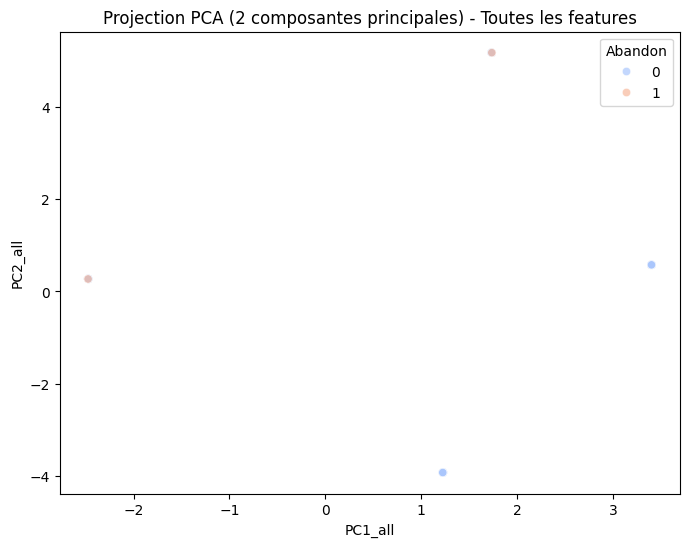

In [109]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_data, x='PC1_all', y='PC2_all', hue='Abandon', palette='coolwarm', alpha=0.7)
plt.title('Projection PCA (2 composantes principales) - Toutes les features')
plt.xlabel('PC1_all')
plt.ylabel('PC2_all')
plt.legend(title='Abandon')
plt.show()

### on peut pas applique la pca car les donnees sont trop enrelacé